In [52]:
import numpy as np
import csv, sys
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from matplotlib.ticker import MaxNLocator

In [53]:
with open('input2.csv', 'rb') as csvfile:
    data = list(csv.reader(csvfile, delimiter=','))
csv_data = np.array(data, dtype=np.double)
values = csv_data[:,2]
features = csv_data[:,[0,1]]
n = features.shape[0]

In [54]:
stddev = np.std(features, axis=0)
stddev

array([1.8994815, 6.1174539])

In [55]:
stddev_tiles = np.tile(stddev, (features.shape[0],1))
stddev_tiles

array([[1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [1.8994815, 6.1174539],
       [

In [56]:
mean = np.mean(features, axis=0)
mean_tiles = np.tile(mean, (features.shape[0],1))
mean

array([5.2105063, 18.3066043])

In [57]:
features = np.divide(np.add(features, -mean_tiles), stddev_tiles)
float_formatter = lambda x: "%.20f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
ones = np.ones((csv_data.shape[0],1), dtype=np.integer)
features = np.append(ones, features, axis=1)
features

array([[1.00000000000000000000, -1.69020138409317466355,
        -1.32348103952970186370],
       [1.00000000000000000000, -1.66914300624459821520,
        -0.85500836663530555004],
       [1.00000000000000000000, -1.62176165608530142848,
        -1.12132177335183547129],
       [1.00000000000000000000, -1.57964490038814853179,
        -0.63208719506627641938],
       [1.00000000000000000000, -1.53752814469099563510,
        -0.93345766996790002779],
       [1.00000000000000000000, -1.49014679453169884837,
        -1.27286684563736507414],
       [1.00000000000000000000, -1.44803003883454595169,
        -0.88458930041677763523],
       [1.00000000000000000000, -1.40591328313739305500,
        -1.01180725861433917778],
       [1.00000000000000000000, -1.35853193297809626827,
        -0.25267935291256921060],
       [1.00000000000000000000, -1.31641517728094337158,
        -1.16016636494385183553],
       [1.00000000000000000000, -1.27429842158379069694,
        -0.78749662010707810467],

In [58]:
beta = np.zeros((1, features.shape[1]))
beta

array([[0.00000000000000000000, 0.00000000000000000000,
        0.00000000000000000000]])

In [47]:
np.sum((features.T) * (np.sum(beta * features, axis=1) - values), axis=1)

array([-86.6204041, -10.2419933, -7.5603099])

In [8]:
features.T.shape

(3, 79)

In [9]:
R = 0.5 * np.sum(np.square(np.sum(beta * features, axis=1) - values)) / csv_data.shape[0]
features.shape

(79, 3)

In [66]:
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,0.99, 1, 5, 10]
#alpha_values = [0.001]
r_value = []

iterations = 100
for alpha in alpha_values:
    rval = []
    #print alpha
    for i in range(1, iterations+1):
        beta = beta - alpha / n * np.sum((features.T) * (np.sum(beta * features, axis=1) - values), axis=1)
        rval.append(0.5 * np.sum(np.square(np.sum(beta * features, axis=1) - values)) / csv_data.shape[0])
    r_value.append(rval)
    print alpha,"->",beta
    beta = np.zeros((1, features.shape[1]))

0.001 -> [[0.10439167962663131739 0.01202818799377763231 0.00867810000976813184]]
0.005 -> [[0.43225726708025014045 0.04573319970802045692 0.02983411323182248720]]
0.01 -> [[0.69512069348409821767 0.06860855418113966098 0.03878003956381400469]]
0.05 -> [[1.08996918311960500070 0.11200686865659006952 0.01799780435581841559]]
0.1 -> [[1.09643168785942868304 0.12436207434991400356 0.00565764116543158394]]
0.4 -> [[1.09646081139240481050 0.12861643508874287534 0.00140328113119296029]]
0.5 -> [[1.09646081139240481050 0.12861719390874365443 0.00140252231119217382]]
0.6 -> [[1.09646081139240503255 0.12861723063988761417 0.00140248558004819630]]
0.7 -> [[1.09646081139240503255 0.12861723225668877935 0.00140248396324703980]]
0.8 -> [[1.09646081139240503255 0.12861723232100791270 0.00140248389892791382]]
0.9 -> [[1.09646081139240503255 0.12861723232330485311 0.00140248389663097731]]
0.99 -> [[1.09646081139240503255 0.12861723232337682332 0.00140248389655860031]]
1 -> [[0.00000000000000000000 0.0

In [16]:
r_value

[[0.61065406684994505,
  0.60942898748109975,
  0.60820639322102898,
  0.60698627897424251,
  0.60576863965587879,
  0.60455347019168426,
  0.60334076551798921,
  0.60213052058168481,
  0.60092273034020205,
  0.59971738976148725,
  0.59851449382398136,
  0.59731403751659562,
  0.59611601583869067,
  0.59492042380005306,
  0.59372725642087465,
  0.59253650873172725,
  0.5913481757735437,
  0.5901622525975937,
  0.5889787342654621,
  0.58779761584902723,
  0.58661889243043797,
  0.58544255910209297,
  0.58426861096661797,
  0.58309704313684374,
  0.5819278507357849,
  0.58076102889661718,
  0.57959657276265708,
  0.57843447748733845,
  0.57727473823419218,
  0.57611735017682475,
  0.57496230849889463,
  0.57380960839409345,
  0.5726592450661232,
  0.57151121372867464,
  0.57036550960540644,
  0.56922212792992344,
  0.56808106394575586,
  0.56694231290633779,
  0.56580587007498617,
  0.56467173072487975,
  0.5635398901390376,
  0.56241034361029796,
  0.56128308644129843,
  0.5601581139444

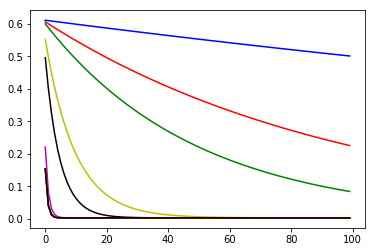

In [69]:
series = list(range(100))
plt.plot(series, r_value[0],'b-',label='0.001')
plt.plot(series, r_value[1],'r-',label='0.005')
plt.plot(series, r_value[2],'g-',label='0.01')
plt.plot(series, r_value[3],'y-',label='0.05')
plt.plot(series, r_value[4],'k-',label='0.1')
plt.plot(series, r_value[5],'m-',label='0.5')
plt.plot(series, r_value[6],'c-',label='0.6')
plt.plot(series, r_value[6],'y-',label='0.7')
plt.plot(series, r_value[6],'g-',label='0.8')
plt.plot(series, r_value[6],'r-',label='0.9')
plt.plot(series, r_value[6],'k-',label='0.99')